Тестирование нововедений в веб магазине

Проведение A/B тестирования

Были разработаны 2 формата страницы нового продукта для веб площадки. Этот продуки представляет из себя сок натурального производства в коробке обьемом 5 литров и имеет название "Сады Кукушкина". Для того, чтобы выяснить какой формат рекламы будет более эфэективен, был поставлен эксперимент. Выборки посетителей веб сайта из 1000 людей был показан случайным образом один из двух форматов.


Формат 1 получил 240 заказов на товар

Формат 2 получил 216 заказов на товар

In [75]:
#Проверим гипотезу что вероятность покупки при формате 1 и формате 2 одинаковы

from math import sqrt
p_A = 240/1000 #формат 1
sigma_A =  sqrt(p_A*(1-p_A)/1000)
p_B = 216/1000 #формат 2
sigma_B =  sqrt(p_B*(1-p_B)/1000)
z = (p_B - p_A) / sqrt(sigma_A**2+sigma_B**2)
z

-1.2796697172133276

по таблице это 0,10 итого 2*0,102 = 0,204 тоесть 20.4% вероятность того, что p_A=p_B.

В тоже время был проведен анализ еще 2 форматов страницы для продукта того же типа но фирмы "Твоя семья".

Формат 1 получил 310 заказов

Формат 1 получил 298 заказов

In [76]:
p_A = 310/1000 #формат 1
sigma_A =  sqrt(p_A*(1-p_A)/1000)
p_B = 298/1000 #формат 2
sigma_B =  sqrt(p_B*(1-p_B)/1000)
z = (p_B - p_A) / sqrt(sigma_A**2+sigma_B**2)
z


-0.5833937690358414

по таблице это 0,281 итого 2*0,281 = 0,562 тоесть 56,2% вероятность того, что p_A=p_B .И это уже требует дополнительного анализа. 

In [77]:
import pandas as pd
data_A = pd.read_csv("Формат 1.csv")
data_B = pd.read_csv("Формат 2.csv")

Это два отчета представляющие из себя 2 столбца. Первый столб показывает количество заказов откликнувшегося человека, а второй сумму. В обоих форматах цена 1 сока стоила 76.34

In [78]:
#Вот демонстрация того как это выглядит
data_A

,Количество,Цена
0,1,76.34
1,2,152.68
2,1,76.34
3,1,76.34
4,1,76.34
...,...,...
305,3,229.02
306,2,152.68
307,1,76.34
308,2,152.68


In [79]:
print(f"Общая сумма покупок в откликах на A формат {sum(data_A['Цена'])}")
print(f"Общая сумма покупок в откликах на B формат {sum(data_B['Цена'])}")


Общая сумма покупок в откликах на A формат 56873.299999999894
Общая сумма покупок в откликах на B формат 59621.53999999987


Значение формата B гораздо весомее. Ведь, имея 
меньше откликов, прибыль с соков больше.

In [80]:
#Введем такую функцию чтобы установить доверительный интервал обоих чеков
#для каждого формата страницы на веб сайте.
def Interval(Mv, Z_Alfa, sigma, n):
    """
    :param Mv: среднее по выборке(мат ожидание выборке)
    :param Z_Alfa: Z(Alfa) уже найденый из таблицы ну или от Alfa/2 если распределение нормальное
    :param sigma: сигма от Г.с или S если было решение по стьюденту
    :param n: Количество в выборке
    :return:
    """
    start = Mv-Z_Alfa*(sigma/sqrt(n)) # от
    end = Mv+Z_Alfa*(sigma/sqrt(n)) # до
    print(f"[{start}:{end}]")
    return start, end

In [81]:
#A
MA = sum(data_A['Цена'])/310#Мат ожидание
sigma_A = sqrt(sum([(i-MA)**2 for i in list(data_A['Цена'])])/310)
Alfa = 0.05 # по стьюденту 1.968
start_A, end_A = Interval(MA, 1.968, sigma_A, 310)

[168.16282653180758:198.761689597224]


In [82]:
#B
MB = sum(data_B['Цена'])/298#Мат ожидание
sigma_B = sqrt(sum([(i-MB)**2 for i in list(data_B['Цена'])])/298)
Alfa = 0.05 # по стьюденту 1.968
start_B, end_B = Interval(MB, 1.968, sigma_B, 298)

[182.2467612510065:217.89780250738193]


In [83]:
print(f"Средний чек в A {MA}")
print(f"Средний чек в B {MB}")

Средний чек в A 183.4622580645158
Средний чек в B 200.0722818791942


In [84]:
print(f"MB больше на MA {round(((MB-MA)/MA)*100, 2)}%")
print()

MB больше на MA 9.05%



Отличие среднего чека возможно не так значимо. Опять нужен дополнительный анализ. Попробуем посмотреть вероятность того что их мат ожидание одинаково.

In [85]:
z = (MA - MB) / sqrt(sigma_A**2+sigma_B**2)
z

-0.07993003341155748

Это по таблице Стьюдента равно 0.214 , значит вероятность того что p_A=p_B по среднему чеку равна (0.214*2)*100=42.8%. Для наглядности посмотрим еще график роста прибыли с одного и другого теста.

In [86]:
import matplotlib.pyplot as plt

astep = []
bstep = []
aincome = []
bincome = []
a_all_income = 0
b_all_income = 0

for i in range(310):
    astep.append(i+1)
    a_all_income += data_A['Цена'][i]
    aincome.append(a_all_income)

for i in range(298):
    bstep.append(i+1)
    b_all_income += data_B['Цена'][i]
    bincome.append(b_all_income)


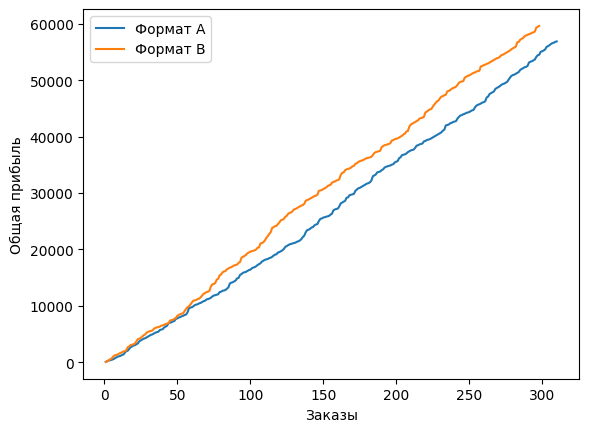

In [87]:
plt.plot(astep, aincome, label = "Формат А")
plt.plot(bstep, bincome, label = "Формат B")
plt.xlabel("Заказы")
plt.ylabel("Общая прибыль")
plt.legend()

 Более глубокий анализ помог нам привести к точности наше A/B тестирование и в итоге будет выбран формат 2 для сока "Твоя семья". 

In [1]:
import numpy as np